# Concatenate

## Import libraries

In [1]:
# Fix randomness and hide warnings
SEED = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(SEED)

import logging

import random
random.seed(SEED)



# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(SEED)
tf.compat.v1.set_random_seed(SEED)


# Import other libraries
from keras.models import Model, load_model
from tensorflow.keras.utils import plot_model
import os
import shutil

In [ ]:
WINDOW = 200
STRIDE = 10
TELESCOPE = 18

INPUT_SHAPE = [WINDOW, 1]

## Concatenate Models

In [5]:
num_models = 6
path_models = [
    "/kaggle/input/model-cata/model_cat_0",
    "/kaggle/input/model-catb/model_cat_1",
    "/kaggle/input/model-catc/model_cat_2",
    "/kaggle/input/model-catd/model_cat_3",
    "/kaggle/input/model-cate/model_cat_4",
    "/kaggle/input/model-catf/model_cat_5",
    "/kaggle/working/ModelConcatenate"     # output model
]
models = []

for i in range(num_models):
    # load model
    modelTemp = load_model(path_models[i])
    # change name to be unique
    modelTemp._name = "model_" + str(i + 1)
    models.append(modelTemp)

In [6]:
def concatenate(models):
    # collect outputs of models in a list
    inputs = [tfkl.Input(shape=INPUT_SHAPE) for _ in range(6)]
    yModels = [model(inputs[i]) for i, model in enumerate(models)]

    # concatenate outputs
    concatenate = tfkl.Concatenate(axis=0, name="concatenate_layer")(yModels)

    # build model from same input and avg output
    modelConcatenate = tfk.Model(inputs=inputs, outputs=concatenate, name='concatenate')
    return modelConcatenate

modelConcatenate = concatenate(models)
modelConcatenate.summary()

Model: "concatenate"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200, 1)]             0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 200, 1)]             0         []                            
                                                                                                  
 input_3 (InputLayer)        [(None, 200, 1)]             0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 200, 1)]             0         []                            
                                                                                        

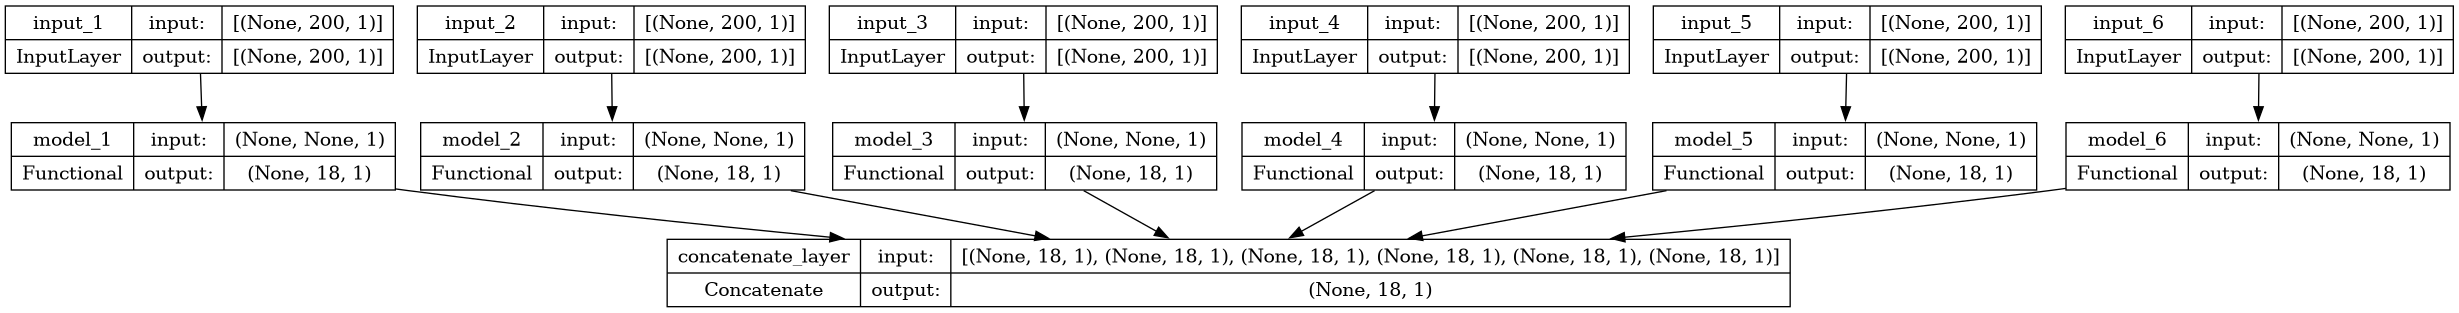

In [7]:
plot_model(modelConcatenate, show_shapes=True, show_layer_names=True)

In [8]:
modelConcatenate.save("model")